In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
mall = pd.read_csv('Mall_Customers.csv')
mall.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
mall.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [4]:
mall.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
mall.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
mall.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [22]:
mall['Gender'] = np.where(mall.Gender == 'Male',1,0)

In [23]:
mall.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


## Taking only two Features

In [90]:
## because we are doing clustring so we do not need other columns
X = mall[['Annual Income (k$)','Spending Score (1-100)']]
X.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [91]:
X = X.values

In [92]:
## getting the actual k value
wcss = []
for i in range(1,11):
    kmeans = KMeans(i)
    kmeans.fit(X)
    
    wcss.append(kmeans.inertia_)

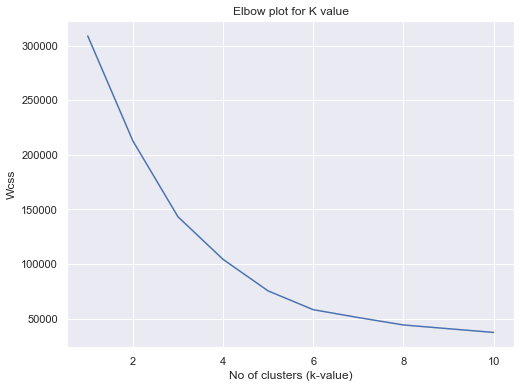

In [50]:
import seaborn as sns
sns.set()
plt.figure(figsize=(8,6))
plt.plot(range(1,11),wcss)
plt.title("Elbow plot for K value")
plt.xlabel("No of clusters (k-value)")
plt.ylabel("Wcss")
plt.show()

In [93]:
## so here we can take 5 because after 5 there is no significient drop.
## optimum nof of cluster = 5

In [96]:
from sklearn.cluster import KMeans

k_means = KMeans(n_clusters=5)
y = k_means.fit_predict(X)

In [97]:
y

array([2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 4,
       2, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 3, 1, 4, 1, 3, 1, 3, 1,
       4, 1, 3, 1, 3, 1, 3, 1, 3, 1, 4, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1])

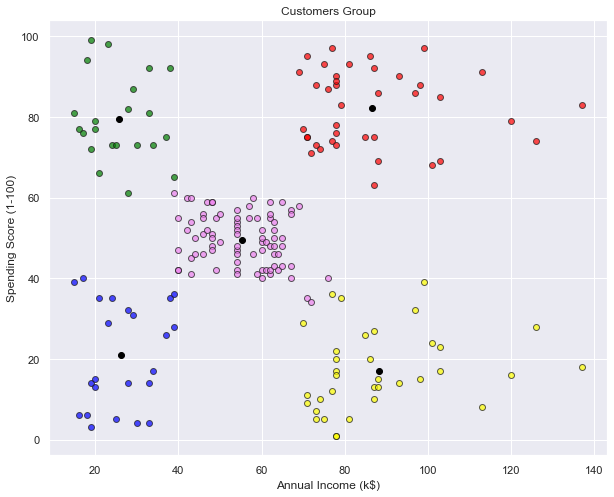

In [101]:
## ploting the clusters

plt.figure(figsize=(10,8))

## here X[y==0,0] means --> first 0 of y is the cluster no , and second 0 of y is X column number
## so it first is reperesent cluster 0 and X[0] , then cluster 0 and X[1] and last cluster 0 and X[2]
plt.scatter(X[y==0,0] , X[y==0,1] , c='green' , label='Cluster-1' ,linewidths=1, alpha=.7,edgecolor='k')
plt.scatter(X[y==1,0] , X[y==1,1], c='red' , label='Cluster-2',linewidths=1, alpha=.7,edgecolor='k')
plt.scatter(X[y==2,0] , X[y==2,1],  c='blue' , label='Cluster-3',linewidths=1, alpha=.7,edgecolor='k')
plt.scatter(X[y==3,0] , X[y==3,1],  c='yellow' , label='Cluster-4',linewidths=1, alpha=.7,edgecolor='k')
plt.scatter(X[y==4,0] , X[y==4,1], c='violet' , label='Cluster-5', linewidths=1, alpha=.7,edgecolor='k')


#plot centroid
## here h=first parameter has 0 means X asis value and 1 means y axis value
plt.scatter(k_means.cluster_centers_[:,0] , k_means.cluster_centers_[:,1], c='black' , label='centroid')

plt.title("Customers Group")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")

plt.show()


## Insights:
- The green group of cluster have less income but high spending score in mall. So we can provide offers to these clustered people so they can stay in mall as customer.
- The blue group of cluster have less income and also less spending score in mall. which is pretty obouse.So we can provide offers to these clustered people so they can stay in mall as customer.
- The violet group of cluster have average income and average spending score in mall.
- The yellow group of cluster have high income but less spending score in mall. So we can provide better offers to gain there attention or can take advice to make them customer of a mall.
- The red group of cluster have high income and also high spending score in mall.

## incresing the feature 2 to 4


In [102]:
mall.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [119]:
X = mall.iloc[:,2:]
X = X.values

In [120]:
wcss_2 = []
for i in range(1,11):
    k_means = KMeans(n_clusters=i)
    k_means.fit(X)
    wcss_2.append(k_means.inertia_)

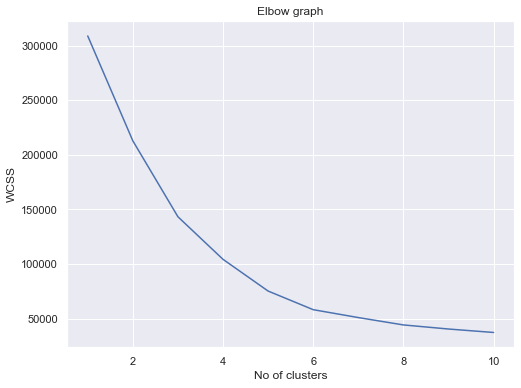

In [121]:
## ploting the elbow graph
sns.set()
plt.figure(figsize=(8,6))
plt.plot(range(1,11),wcss_2)
plt.title("Elbow graph")
plt.xlabel("No of clusters")
plt.ylabel("WCSS")
plt.show()

In [122]:
### so we can take 5 as a cluster nymber
kmeans_2 = KMeans(n_clusters=5)
Y = kmeans_2.fit_predict(X)

In [123]:
Y

array([2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0,
       4, 4, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 1, 3, 4, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 4, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3])

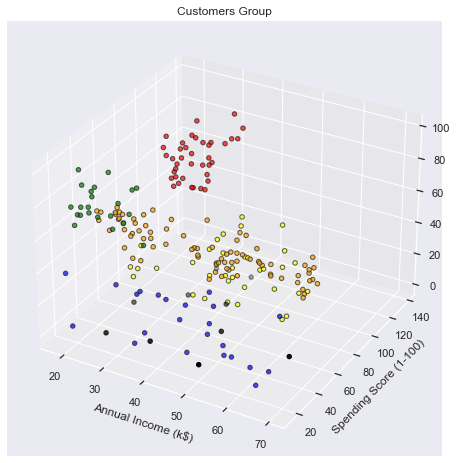

In [124]:
## ploting the clusters
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10,8))

ax = fig.add_subplot(111, projection = '3d')

## here X[y==0,0] means --> first 0 of y is the cluster no , and second 0 of y is X column number
## so it first is reperesent cluster 0 and X[0] , then cluster 0 and X[1] and last cluster 0 and X[2]
ax.scatter3D(X[y==0,0] , X[y==0,1], X[y==0,2] , c='green' , label='Cluster-1' ,linewidths=1, alpha=.7,edgecolor='k')


ax.scatter(X[y==1,0] , X[y==1,1], X[y==1,2] , c='red' , label='Cluster-2',linewidths=1, alpha=.7,edgecolor='k')

ax.scatter(X[y==2,0] , X[y==2,1], X[y==2,2] ,  c='blue' , label='Cluster-3',linewidths=1, alpha=.7,edgecolor='k')
ax.scatter(X[y==3,0] , X[y==3,1], X[y==3,2] , c='yellow' , label='Cluster-4',linewidths=1, alpha=.7,edgecolor='k')
ax.scatter(X[y==4,0] , X[y==4,1], X[y==4,2] , c='orange' , label='Cluster-5', linewidths=1, alpha=.7,edgecolor='k')
ax.scatter(X[y==5,0] , X[y==5,1], X[y==5,2] , c='cyan' , label='Cluster-6',linewidths=1, alpha=.7,edgecolor='k')

#plot centroid
## here h=first parameter has 0 means X asis value and 1 means y axis value
ax.scatter(k_means.cluster_centers_[:,0] , k_means.cluster_centers_[:,1], c='black' , label='centroid')

plt.title("Customers Group")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")

plt.show()